   # Credit Card Default Detection

In [140]:
# CPE 695-A Final Project Team 2

# Group Members:
# Yash S Admuthe
# Jerry Veembukattu Thomas
# Nikhil Chouhan



import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import imblearn
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [108]:
# reading csv file

df=pd.read_csv('credit_data.csv')

In [109]:
# It show first 10 records of datasets
df.head(10)

,CARDHLDR,DEFAULT,AGE,ACADMOS,ADEPCNT,MAJORDRG,MINORDRG,OWNRENT,INCOME,SELFEMPL,INCPER,EXP_INC,SPENDING,LOGSPEND
0,0,0,27.250000,4,0,0,0,0,1200.000000,0,18000.0,0.000667,,
1,0,0,40.833332,111,3,0,0,1,4000.000000,0,13500.0,0.000222,,
2,1,0,37.666668,54,3,0,0,1,3666.666667,0,11300.0,0.033270,121.9896773,4.8039364
3,1,0,42.500000,60,3,0,0,1,2000.000000,0,17250.0,0.048427,96.8536213,4.5732008
4,1,0,21.333334,8,0,0,0,0,2916.666667,0,35000.0,0.016523,48.1916700,3.8751862
5,1,0,20.833334,78,1,0,0,0,1750.000000,0,11750.0,0.031323,54.8159555,4.0039813
6,1,0,62.666668,25,1,0,0,1,5250.000000,0,36500.0,0.039269,206.1624667,5.3286645
7,1,0,20.333334,6,0,0,0,0,1833.333333,0,47000.0,0.049142,90.0938977,4.5008524
8,1,0,31.750000,20,3,0,0,0,2919.333333,0,8758.0,0.010049,29.3358326,3.3788097
9,1,0,45.833332,162,7,0,0,1,4916.666667,0,7375.0,0.094078,462.5508475,6.1367565


In [110]:
# Define shape datasets (Total number of rows- 13444 , Total number of columns- 14)
df.shape

(13444, 14)

In [111]:
# statistical summary of numerical values
df.describe()

,CARDHLDR,DEFAULT,AGE,ACADMOS,ADEPCNT,MAJORDRG,MINORDRG,OWNRENT,INCOME,SELFEMPL,INCPER,EXP_INC
count,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000
mean,0.780943,0.074085,33.471828,55.318878,1.017257,0.462809,0.290539,0.455965,2509.527819,0.057944,21719.680793,0.070974
std,0.413623,0.261919,10.226484,63.089729,1.279098,1.432724,0.767620,0.498076,1252.946716,0.233646,13591.209469,0.103922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,362.500000,0.000088
25%,1.000000,0.000000,25.666666,12.000000,0.000000,0.000000,0.000000,0.000000,1666.666667,0.000000,12000.000000,0.002706
50%,1.000000,0.000000,31.500000,30.000000,1.000000,0.000000,0.000000,0.000000,2166.666667,0.000000,19000.000000,0.039286
75%,1.000000,0.000000,39.333332,72.000000,2.000000,0.000000,0.000000,1.000000,2916.666667,0.000000,27658.666504,0.095655
max,1.000000,1.000000,88.666664,576.000000,9.000000,22.000000,11.000000,1.000000,8333.250000,1.000000,150000.000000,2.037728


In [112]:
# Print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13444 entries, 0 to 13443
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CARDHLDR   13444 non-null  int64  
 1   DEFAULT    13444 non-null  int64  
 2   AGE        13444 non-null  float64
 3   ACADMOS    13444 non-null  int64  
 4   ADEPCNT    13444 non-null  int64  
 5   MAJORDRG   13444 non-null  int64  
 6   MINORDRG   13444 non-null  int64  
 7   OWNRENT    13444 non-null  int64  
 8   INCOME     13444 non-null  float64
 9   SELFEMPL   13444 non-null  int64  
 10  INCPER     13444 non-null  float64
 11  EXP_INC    13444 non-null  float64
 12  SPENDING   13444 non-null  object 
 13  LOGSPEND   13444 non-null  object 
dtypes: float64(4), int64(8), object(2)
memory usage: 1.4+ MB


In [113]:
# Shows each column Name
df.columns

Index(['CARDHLDR', 'DEFAULT', 'AGE', 'ACADMOS', 'ADEPCNT', 'MAJORDRG',
       'MINORDRG', 'OWNRENT', 'INCOME', 'SELFEMPL', 'INCPER', 'EXP_INC',
       'SPENDING', 'LOGSPEND '],
      dtype='object')

In [114]:
# Rename the logspend column name
df.rename(columns={'LOGSPEND ':'LOGSPEND'},inplace=True)

In [115]:
df.columns

Index(['CARDHLDR', 'DEFAULT', 'AGE', 'ACADMOS', 'ADEPCNT', 'MAJORDRG',
       'MINORDRG', 'OWNRENT', 'INCOME', 'SELFEMPL', 'INCPER', 'EXP_INC',
       'SPENDING', 'LOGSPEND'],
      dtype='object')

In [116]:
# Remove the Logspend column from dataset
df.drop('LOGSPEND',axis=1,inplace=True)

In [117]:
# Convert the datatype of spending from object to numeric type
df['SPENDING'] = pd.to_numeric(df['SPENDING'], errors='coerce')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13444 entries, 0 to 13443
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CARDHLDR  13444 non-null  int64  
 1   DEFAULT   13444 non-null  int64  
 2   AGE       13444 non-null  float64
 3   ACADMOS   13444 non-null  int64  
 4   ADEPCNT   13444 non-null  int64  
 5   MAJORDRG  13444 non-null  int64  
 6   MINORDRG  13444 non-null  int64  
 7   OWNRENT   13444 non-null  int64  
 8   INCOME    13444 non-null  float64
 9   SELFEMPL  13444 non-null  int64  
 10  INCPER    13444 non-null  float64
 11  EXP_INC   13444 non-null  float64
 12  SPENDING  10499 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 1.3 MB


In [119]:
# how many null values are present
df.isnull().sum()

CARDHLDR       0
DEFAULT        0
AGE            0
ACADMOS        0
ADEPCNT        0
MAJORDRG       0
MINORDRG       0
OWNRENT        0
INCOME         0
SELFEMPL       0
INCPER         0
EXP_INC        0
SPENDING    2945
dtype: int64

(13.5, -0.5)

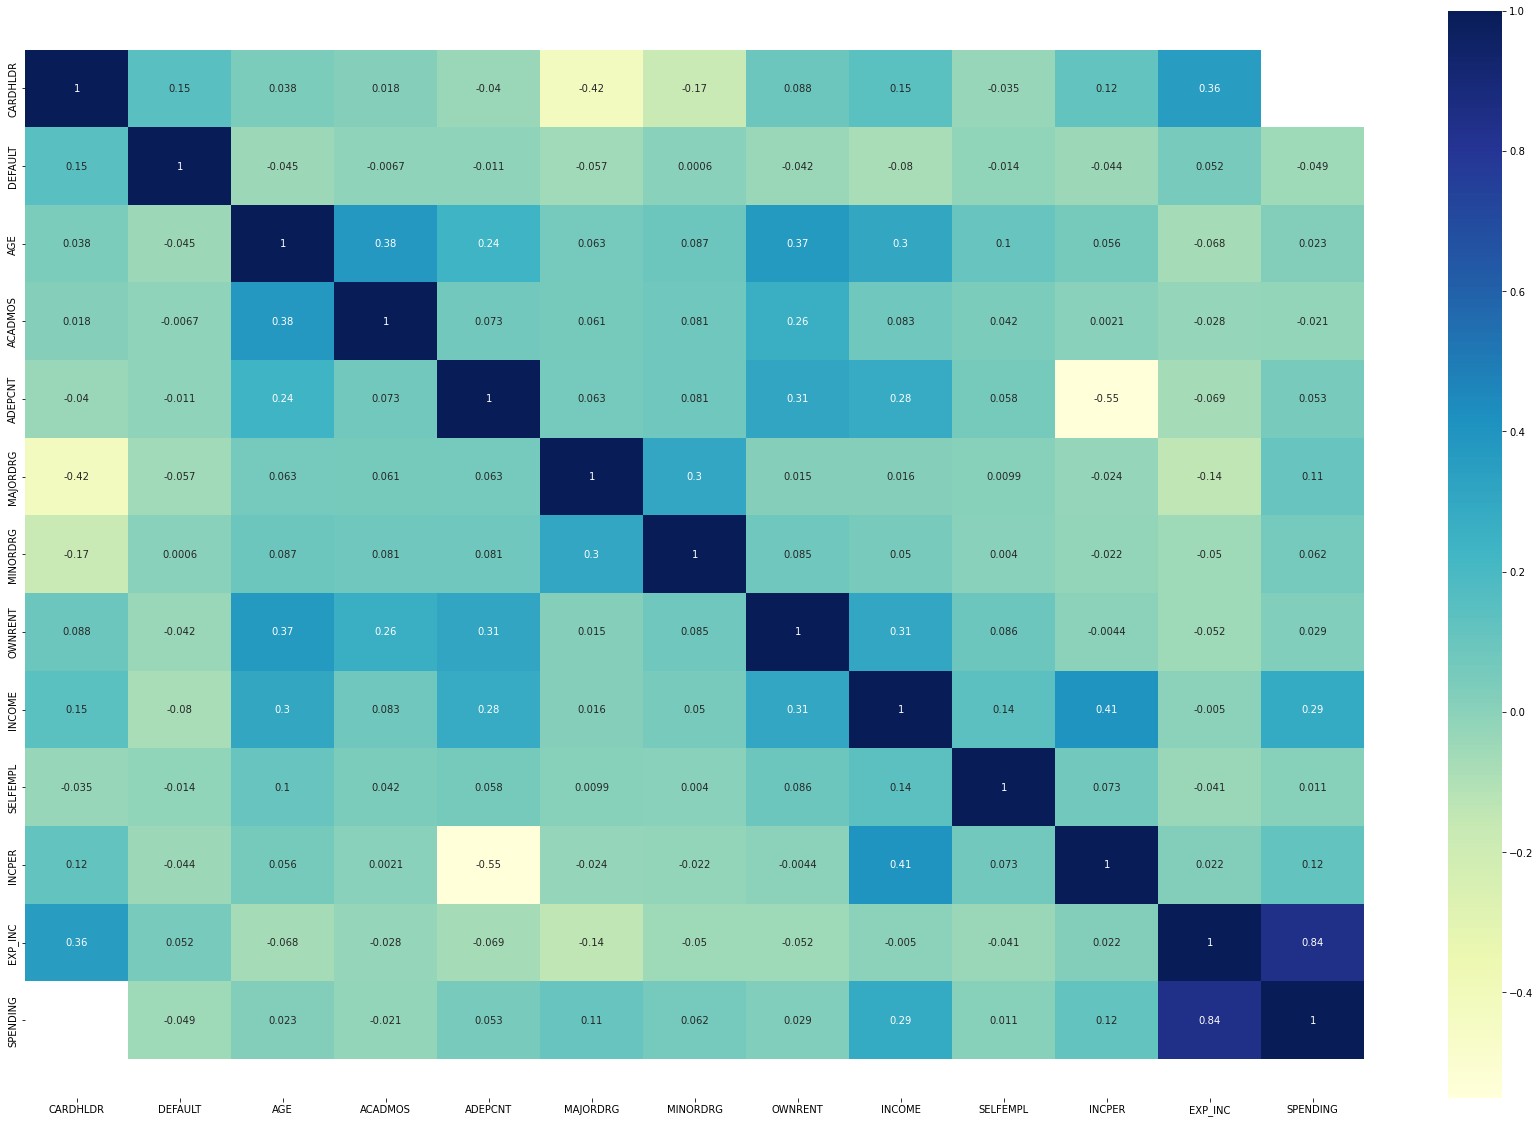

In [120]:
# heatmap to show relation between variables
plt.figure(figsize=(30,20))
ax = sns.heatmap(data = df.corr(),cmap='YlGnBu',annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEFAULT', ylabel='count'>

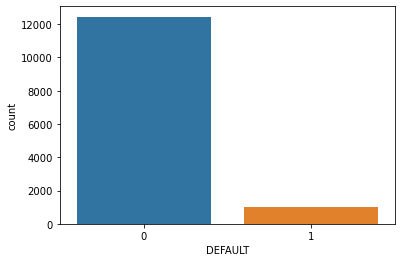

In [121]:
# plot the number of 0's and 1's in Default features (It shows imbalanced data)
sns.countplot(df['DEFAULT'])

0    12448
1      996
Name: DEFAULT, dtype: int64


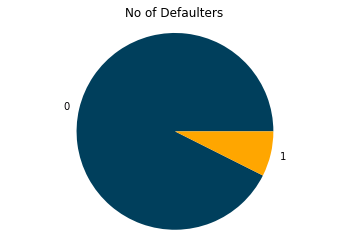

In [122]:
# plot the pie chart to show number of 0's and 1's in Default features (It shows imbalanced data)
value_counts = df["DEFAULT"].value_counts()
print(value_counts)
fig, ax = plt.subplots()
plot = ax.pie(x=[value_counts[0], value_counts[1]], labels=[0,1], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
plot = ax.axis('equal')
plot = ax.set_title('No of Defaulters')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CARDHLDR', ylabel='count'>

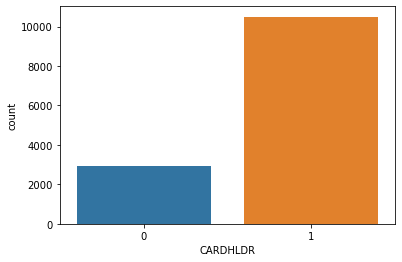

In [123]:
# count the number of application of credit card accepted or not
sns.countplot(df['CARDHLDR'])

<AxesSubplot:xlabel='SELFEMPL', ylabel='count'>

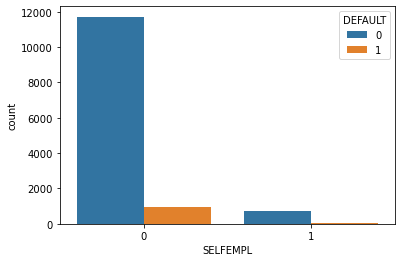

In [124]:
# counting the number of self employed or not are defaulter or not
sns.countplot(x = 'SELFEMPL', hue ='DEFAULT', data = df)

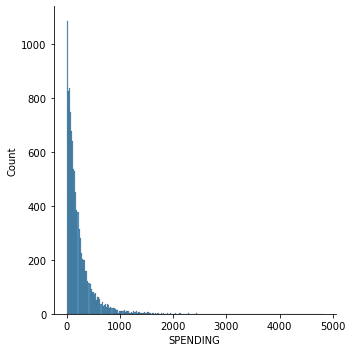

In [125]:
# checking the distribution of spending column (it shows a right skewed)
sns.displot(df['SPENDING'])

In [126]:
# filling N/A value with medium of spending column
df.fillna(df['SPENDING'].median(),inplace=True)

In [127]:
# checking the maximum value of income features
df['INCOME'].max()

8333.25

In [128]:
# checking the minmum value of income features
df['INCOME'].min()

50.0

<AxesSubplot:xlabel='INC_group', ylabel='count'>

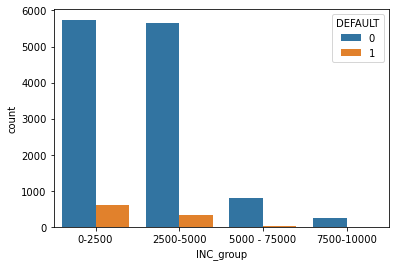

In [129]:
# plot the range of income which are defaulter or not
bins = [-1, 2500, 5000, 7500,10000]
labels=['0-2500','2500-5000','5000 - 75000', '7500-10000']
df['INC_group'] = pd.cut(df['INCOME'], bins=4, labels = labels)
sns.countplot(x = 'INC_group', hue ='DEFAULT', data = df)

<AxesSubplot:xlabel='AGE_group', ylabel='count'>

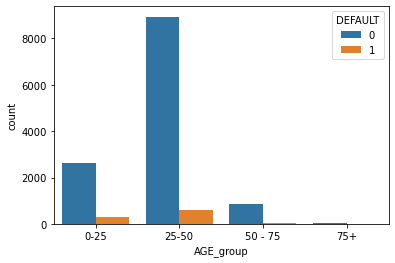

In [130]:
# plot the range of age which are defaulter or not
bins = [-1, 25, 50, 75,100]
labels=['0-25','25-50','50 - 75', '75+', ]
df['AGE_group'] = pd.cut(df['AGE'], bins=bins, labels = labels)
sns.countplot(x = 'AGE_group', hue ='DEFAULT', data = df)

In [131]:
# finding the log of spending column
df['SPENDING']=np.log(df['SPENDING'])

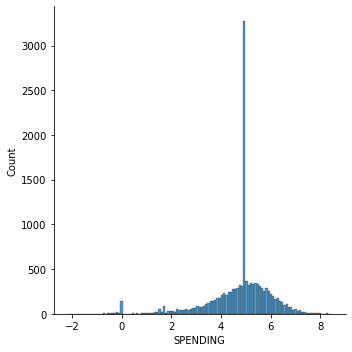

In [132]:
# distribution plot of spending ("It shows normal distribution")
sns.displot(df['SPENDING'])

In [133]:
df.isnull().sum()

CARDHLDR     0
DEFAULT      0
AGE          0
ACADMOS      0
ADEPCNT      0
MAJORDRG     0
MINORDRG     0
OWNRENT      0
INCOME       0
SELFEMPL     0
INCPER       0
EXP_INC      0
SPENDING     0
INC_group    0
AGE_group    0
dtype: int64

In [134]:
# extracted feature columns and target column
X=df[['CARDHLDR', 'AGE', 'ACADMOS', 'ADEPCNT', 'MAJORDRG',
       'MINORDRG', 'OWNRENT', 'INCOME', 'SELFEMPL', 'INCPER', 'EXP_INC',
       'SPENDING']]
y=df['DEFAULT']

In [135]:
# perform undersampling (due to imbalanced data)
undersample = NearMiss(version=1,n_neighbors=3)
X, y = undersample.fit_resample(X, y)

In [136]:
X.shape

(1992, 12)

In [39]:
# split the dataset into test and train  train:test=70:30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

In [137]:
# Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [138]:
# shows number of record in our training data
X_train.shape

(1334, 12)

In [139]:
# print confusion matrix and calculate accuracy rate
def print_performance(pred,actual):
    actual_array = np.array(actual)
    unique_label = np.unique([actual, pred])
    cf = pd.DataFrame(
        confusion_matrix(actual_array, pred, labels=unique_label), 
        index=['Actual:{:}'.format(x) for x in unique_label], 
        columns=['Pred:{:}'.format(x) for x in unique_label]
    )
    sns.heatmap(cf, annot = True, cmap = 'YlGnBu', fmt = '.8g')
    plt.show()
    print(cf)
    print('Percent of defaulters correctly predicted: ', cf['Pred:1'][1]/(cf['Pred:0'][1] +cf['Pred:1'][1])*100)
    print('Percent of non-defaulters correctly predicted: ', cf['Pred:0'][0]/(cf['Pred:0'][0] +cf['Pred:1'][0])*100)

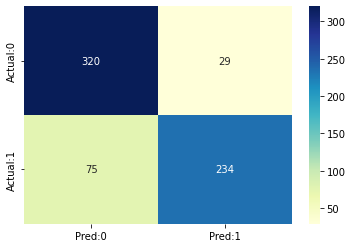

          Pred:0  Pred:1
Actual:0     320      29
Actual:1      75     234
Percent of defaulters correctly predicted:  75.72815533980582
Percent of non-defaulters correctly predicted:  91.69054441260745
Accuracy of the test set:  0.8419452887537994


In [141]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', C = 10, max_iter = 50, penalty='l2')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print_performance(y_pred, y_test)
print("Accuracy of the test set: ", accuracy_score(y_test, y_pred))

In [142]:
# It shows the classification report 
print(classification_report(y_test,y_pred,target_names = ['Defaulted :0', 'Not Defaulted:0']))

                 precision    recall  f1-score   support

   Defaulted :0       0.81      0.92      0.86       349
Not Defaulted:0       0.89      0.76      0.82       309

       accuracy                           0.84       658
      macro avg       0.85      0.84      0.84       658
   weighted avg       0.85      0.84      0.84       658



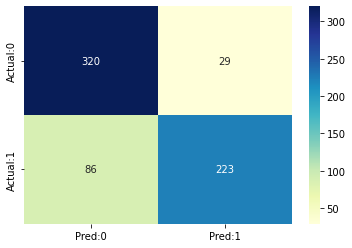

          Pred:0  Pred:1
Actual:0     320      29
Actual:1      86     223
Percent of defaulters correctly predicted:  72.168284789644
Percent of non-defaulters correctly predicted:  91.69054441260745
Accuracy of the test set:  0.8252279635258358


In [143]:
# KNN implementation
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5, algorithm = 'brute')
neigh.fit(X_train,y_train)
y_pred1=neigh.predict(X_test)
print_performance(y_pred1, y_test)
print("Accuracy of the test set: ", accuracy_score(y_test, y_pred1))  

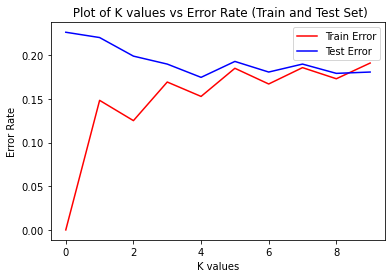

In [144]:
# Plotting graph for varying error rate for k value

train_error = []
test_error = []
for k in range(1,11):
    knn_graph= KNeighborsClassifier(n_neighbors=k)
    knn_graph.fit(X_train,y_train)
    temp1 = knn_graph.predict(X_train)
    train_error.append(np.mean(y_train != temp1))
    temp2 = knn_graph.predict(X_test)
    test_error.append(np.mean(y_test != temp2))


plt.plot(train_error,'r-',label="Train Error")
plt.plot(test_error,'b-',label="Test Error ")
plt.xlabel('K values')
plt.ylabel('Error Rate')
plt.title(' Plot of K values vs Error Rate (Train and Test Set)')
plt.legend()
plt.show()

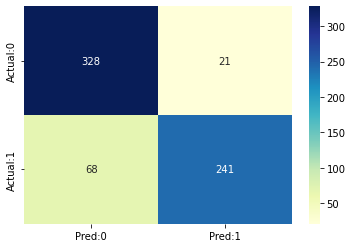

          Pred:0  Pred:1
Actual:0     328      21
Actual:1      68     241
Percent of defaulters correctly predicted:  77.99352750809061
Percent of non-defaulters correctly predicted:  93.98280802292264
Accuracy of the test set:  0.8647416413373861


In [145]:
# Implementation of Random Forest with criterion- Entropy
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=5, random_state=25, n_estimators= 700, criterion='entropy')
clf.fit(X_train,y_train)
y_pred2=clf.predict(X_test)
accuracy_score(y_test, y_pred2)
print_performance(y_pred2, y_test)
print("Accuracy of the test set: ", accuracy_score(y_test, y_pred2))  

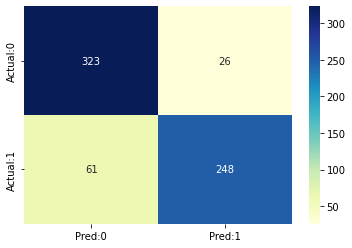

          Pred:0  Pred:1
Actual:0     323      26
Actual:1      61     248
Percent of defaulters correctly predicted:  80.2588996763754
Percent of non-defaulters correctly predicted:  92.55014326647564
Accuracy of the test set:  0.8677811550151976


In [146]:
# Implementation of Random Forest with criterion - gini
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=22, max_depth=7, criterion="gini")
forest.fit(X_train, y_train)
y_test_pred_forest = forest.predict(X_test)
print_performance(y_test_pred_forest, y_test)
print("Accuracy of the test set: ", accuracy_score(y_test, y_test_pred_forest))  

In [147]:
# implementing XGBoost Classifier and performing grid search cv
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

estimator = XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42)
parameters = {'max_depth': range (2, 10, 1),'n_estimators': range(60, 220, 40),'learning_rate': [0.1, 0.01, 0.05]}
grid_search = GridSearchCV(estimator=estimator,param_grid=parameters,scoring = 'roc_auc',n_jobs = 10,cv = 10,verbose=True)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [148]:
# best parameters by GridSearch CV
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=140,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, ...)

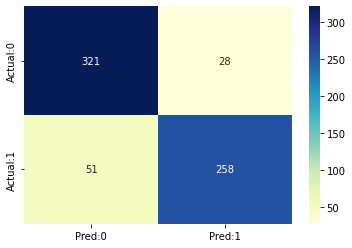

          Pred:0  Pred:1
Actual:0     321      28
Actual:1      51     258
Percent of defaulters correctly predicted:  83.49514563106796
Percent of non-defaulters correctly predicted:  91.97707736389685
Accuracy of the test set:  0.8799392097264438


In [149]:
y_pred3=grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred3)
print_performance(y_pred3, y_test)
print("Accuracy of the test set: ", accuracy_score(y_test, y_pred3))

In [150]:
# Implementing Artificial Neural Network(ANN)
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
      keras.layers.Dense(10,input_dim=12,activation='relu'),
      keras.layers.Dense(8,activation='relu'),
      keras.layers.Dense(5,activation='relu'),
      keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=50,batch_size=5, validation_data=(X_test,y_test))

Epoch 1/50
267/267 [==============================] - 7s 8ms/step - loss: 0.6360 - accuracy: 0.6372 - val_loss: 0.5780 - val_accuracy: 0.7477
Epoch 2/50
267/267 [==============================] - 1s 4ms/step - loss: 0.5191 - accuracy: 0.7774 - val_loss: 0.4686 - val_accuracy: 0.8040
Epoch 3/50
267/267 [==============================] - 1s 3ms/step - loss: 0.4485 - accuracy: 0.7969 - val_loss: 0.4143 - val_accuracy: 0.8085
Epoch 4/50
267/267 [==============================] - 1s 4ms/step - loss: 0.4160 - accuracy: 0.8058 - val_loss: 0.3912 - val_accuracy: 0.8222
Epoch 5/50
267/267 [==============================] - 1s 3ms/step - loss: 0.3967 - accuracy: 0.8178 - val_loss: 0.3823 - val_accuracy: 0.8389
Epoch 6/50
267/267 [==============================] - 1s 3ms/step - loss: 0.3843 - accuracy: 0.8223 - val_loss: 0.3612 - val_accuracy: 0.8359
Epoch 7/50
267/267 [==============================] - 1s 3ms/step - loss: 0.3731 - accuracy: 0.8313 - val_loss: 0.3580 - val_accuracy: 0.8450
Epoch 

21/21 [==============================] - 0s 3ms/step - loss: 0.3229 - accuracy: 0.8663


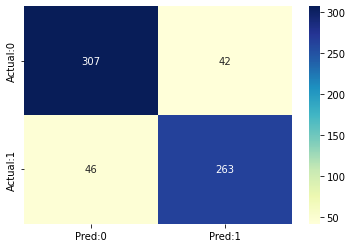

          Pred:0  Pred:1
Actual:0     307      42
Actual:1      46     263
Percent of defaulters correctly predicted:  85.11326860841424
Percent of non-defaulters correctly predicted:  87.96561604584528
Accuracy of the test set:  0.8662613981762918


In [152]:
model.evaluate(X_test,y_test)
y_predict =predictions = (model.predict(X_test) > 0.5).astype("int32")
y_predict_flatten = [item for sublist in y_predict for item in sublist]
print_performance(y_predict_flatten, y_test)
print("Accuracy of the test set: ", accuracy_score(y_test, y_predict_flatten))

In [153]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


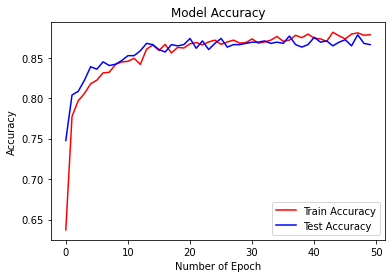

In [154]:
# summarize history for accuracy
plt.plot(history.history['accuracy'], 'r-',label="Train Accuracy")
plt.plot(history.history['val_accuracy'], 'b-',label="Test Accuracy")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epoch')
plt.legend()
plt.show()

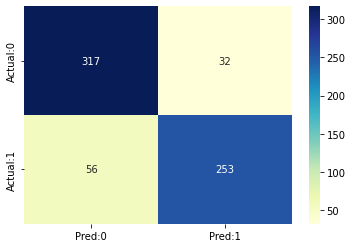

          Pred:0  Pred:1
Actual:0     317      32
Actual:1      56     253
Percent of defaulters correctly predicted:  81.87702265372168
Percent of non-defaulters correctly predicted:  90.83094555873924
Accuracy of the test set:  0.8662613981762918


In [155]:
# Implementaion of Adaptive Boosting
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(n_estimators=1250, learning_rate=0.45, algorithm = 'SAMME.R', random_state=50 )
adaboost_model.fit(X_train, y_train)
y_pred_ada = adaboost_model.predict(X_test)
accuracy_score(y_test, y_pred_ada)
print_performance(y_pred_ada, y_test)
print("Accuracy of the test set: ", accuracy_score(y_test, y_pred_ada))

Text(0, 0.5, 'Models')

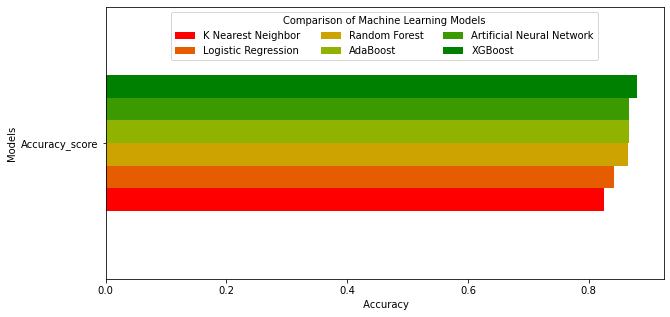

In [156]:
# Gathering accuracy score for each model
from colour import Color
scores = {
    
    
    
    'K Nearest Neighbor': {
        'Accuracy_score': accuracy_score(y_test, y_pred1)
    },
    'Logistic Regression': {
        'Accuracy_score': accuracy_score(y_test, y_pred)
    },
    'Random Forest': {
        'Accuracy_score': accuracy_score(y_test, y_pred2)
    },
    'AdaBoost':{
        'Accuracy_score': accuracy_score(y_test,y_pred_ada)
    },
    'Artificial Neural Network':{
        'Accuracy_score': accuracy_score(y_test, y_predict)
    },
    'XGBoost': {
        'Accuracy_score': accuracy_score(y_test, y_pred3)
    },
    
    
}

red = Color("red")
colors = list(red.range_to(Color("green"),6))
colors = [color.rgb for color in colors]

scores = pd.DataFrame(scores)

ax = scores.plot(kind="barh",figsize=(10, 5), color=colors)
ax.legend(loc='upper center', ncol=3, title="Comparison of Machine Learning Models")

ax.set_xlabel(" Accuracy")
ax.set_ylabel("Models")

CONCLUSION - In all 6 algorithms used to train model, XGBoost has the best prediction of 87% and has lowest error.